In [6]:
#%pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.1 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=ef7dadd86876c50cc58541992ba7e70223226fa71c792ebafe551695a8a39b19
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex


In [3]:
import matplotlib.pyplot as plt
from random import randrange
import numpy as np

In [4]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [7]:
import dalex as dx
import pandas as pd
from scipy.stats import chi2_contingency
from tabulate import tabulate

In [8]:
from sklearn.metrics import confusion_matrix
from scipy.stats import chisquare
from sklearn.metrics import precision_score
from __future__ import print_function

In [45]:
#import dalex as dx
#import pandas as pd
data = pd.read_csv('synthetic_credit_card_approval.csv')
data

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,4,0,36151,0,0,0
1,0,0,36095,1,0,0
2,2,1,62110,1,1,0
3,0,1,73644,1,0,0
4,3,0,99146,0,0,1
...,...,...,...,...,...,...
499995,1,0,43299,1,1,0
499996,8,1,75956,1,1,1
499997,3,0,66476,0,0,0
499998,2,1,74524,0,0,0


In [46]:
target_counts = data['Target'].value_counts()
target_counts

0    306687
1    193313
Name: Target, dtype: int64

It is evident that there is a imbalance between classes. Model can be biases towards the majority of the classes. 

# Data Cleaning
## Transforming/coding text into numbers

In [47]:
from sklearn import preprocessing
#binarizing income where cut-off is the mean
Income = data["Income"]

cond_list = [Income < 72500, Income >= 72500]
choice_list = [0, 1]

data["Income_cat"] = np.select(cond_list, choice_list)

In [48]:
#Binarizing number of children where cut-off is the mean
Num_Children = data["Num_Children"]

cond_list = [Num_Children < 2, Num_Children >= 2]
choice_list = [0, 1]

data["Num_Children_cat"] = np.select(cond_list, choice_list)

In [49]:
data

,Num_Children,Group,Income,Own_Car,Own_Housing,Target,Income_cat,Num_Children_cat
0,4,0,36151,0,0,0,0,1
1,0,0,36095,1,0,0,0,0
2,2,1,62110,1,1,0,0,1
3,0,1,73644,1,0,0,1,0
4,3,0,99146,0,0,1,1,1
...,...,...,...,...,...,...,...,...
499995,1,0,43299,1,1,0,0,0
499996,8,1,75956,1,1,1,1,1
499997,3,0,66476,0,0,0,0,1
499998,2,1,74524,0,0,0,1,1


In [50]:
data.drop(['Num_Children','Income'], axis=1,inplace= True)

In [51]:
data

,Group,Own_Car,Own_Housing,Target,Income_cat,Num_Children_cat
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,1,1,1,0,0,1
3,1,1,0,0,1,0
4,0,0,0,1,1,1
...,...,...,...,...,...,...
499995,0,1,1,0,0,0
499996,1,1,1,1,1,1
499997,0,0,0,0,0,1
499998,1,0,0,0,1,1


## Splitting the data into train and test

In [52]:
#import pandas as pd
#import numpy as np
from sklearn.model_selection import train_test_split
#X = data.drop(["Target"],axis=1) # axis: {0 or ‘index’, 1 or ‘columns’}, default 0
#y = data["Target"]


# asking user for the target column and check  if it is binary or not 

# change 5 in this block, multiple changes

def check_binary_target(target_column_name):
  if not(set(data[target_column_name].unique())==set([0,1])):
    return False 
  return True

print(data.columns.values)
target_column_name=input("Please Enter the name of the target column from the given column names: " )



if check_binary_target(target_column_name):
    print("Target is binary")
    X = data.drop(["Target"],axis=1) # axis: {0 or ‘index’, 1 or ‘columns’}, default 0
    y = data["Target"]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=0)
    print("Data sucessfully loaded!")
else:
  print("Target column is not binary.Please select binary target. ")


'''
if fd.ask_check_for_target(data):
    print("Target is binary")
    X = data.drop(["Target"],axis=1) # axis: {0 or ‘index’, 1 or ‘columns’}, default 0
    y = data["Target"]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=0)
    print("Data sucessfully loaded!")
else:
  print("Target column is not binary.Please select binary target. ")
'''





#X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=0)
#print("Data sucessfully loaded!")




['Group' 'Own_Car' 'Own_Housing' 'Target' 'Income_cat' 'Num_Children_cat']
Please Enter the name of the target column from the given column names: Target
Target is binary
Data sucessfully loaded!


In [53]:
X_test

,Group,Own_Car,Own_Housing,Income_cat,Num_Children_cat
194257,1,1,1,1,0
396319,0,1,0,1,1
138738,0,0,0,1,1
66570,0,0,0,0,0
149424,0,0,0,0,0
...,...,...,...,...,...
362515,0,0,0,0,1
202955,1,1,1,1,1
285428,0,1,0,0,1
48361,1,1,0,0,1


## Trainning a machine learning model

In [54]:
#!pip install xgboost

In [55]:
import xgboost
model = xgboost.XGBClassifier().fit(X_train, y_train)
y_test_predict = model.predict(X_test)
y_test_predict

array([1, 0, 0, ..., 0, 0, 1])

In [56]:
actuals = y_train
predictions = model.predict(X_train)

## Using FairDetect to test biases in the 'number of child' variable

In [65]:
#from fairdetect_class import FairDetect


# using this line to run that file, this updates the changes of that file
%run fairdetect_class_210722_v1.py


#from fairdetect_class_210722_v1 import FairDetect

fd = FairDetect(model,X_test,y_test)

In [66]:
#fd function to find bias

sensitive = 'Num_Children_cat' # sensible variable one wants to test for biases
#labels = {0:'Below 2',1:'2 or More'} # 0 - Less than 2 kids and 1 - 2 or more kids

#target_name={0: 'target 0', 1: 'target 1'}


#change 4  below and commented above lines

#fd.identify_bias(sensitive,labels,target_name)
labels=fd.create_labels(sensitive)
fd.identify_bias(sensitive,labels)



Please Enter Label for Group 0: label 0
Please Enter Label for Group 1: label 1
Please Enter name for target predicted 0: target 0
Please Enter name for target predicted 1: target 1
REPRESENTATION


╒══════════╤═══════════╤═══════════╕
│          │   label 0 │   label 1 │
╞══════════╪═══════════╪═══════════╡
│ target 0 │  0.613326 │  0.614226 │
├──────────┼───────────┼───────────┤
│ target 1 │  0.386674 │  0.385774 │
╘══════════╧═══════════╧═══════════╛ 

Accept H0: No Significant Relation Between Num_Children_cat and Target Detected. p= 0.7790966568927351


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.9916472303121274
Accept H0: False Positive Disparity Not Detected. p= 0.9959732691544855
Accept H0: True Negative Disparity Not Detected. p= 0.9989931576545347
Accept H0: False Negative Disparity Not Detected. p= 0.9814200660354369


PREDICTIVE


Accept H0: No Significant Predictive Disparity. p= 0.9986614271240652


In [62]:
#%pip install shap

In [63]:
import shap

Visualization for affected_group = 0 and affected_target = 0
Model Importance Comparison


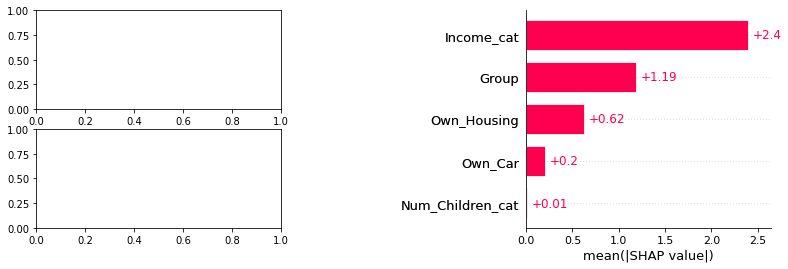

Affected Attribute Comparison
Average Comparison to True Class Members


Average Comparison to All Members


Random Affected Decision Process
Visualization for affected_group = 0 and affected_target = 1
Model Importance Comparison


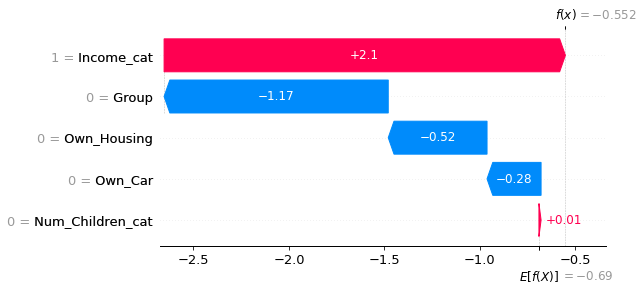

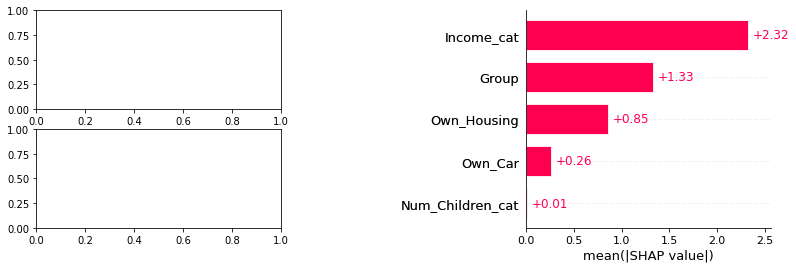

Affected Attribute Comparison
Average Comparison to True Class Members


Average Comparison to All Members


Random Affected Decision Process
Visualization for affected_group = 1 and affected_target = 0
Model Importance Comparison


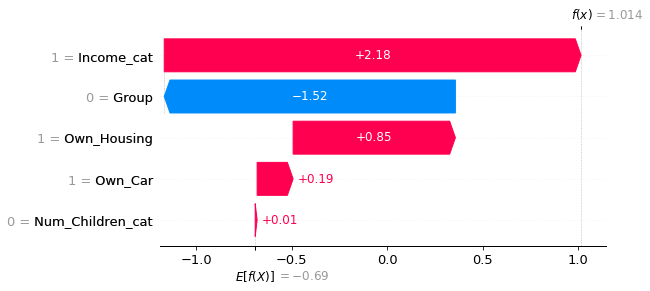

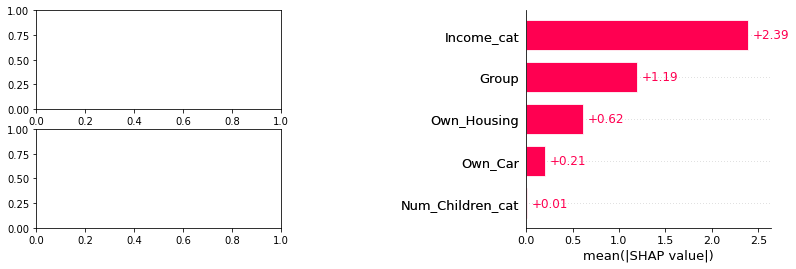

Affected Attribute Comparison
Average Comparison to True Class Members


Average Comparison to All Members


Random Affected Decision Process
Visualization for affected_group = 1 and affected_target = 1
Model Importance Comparison


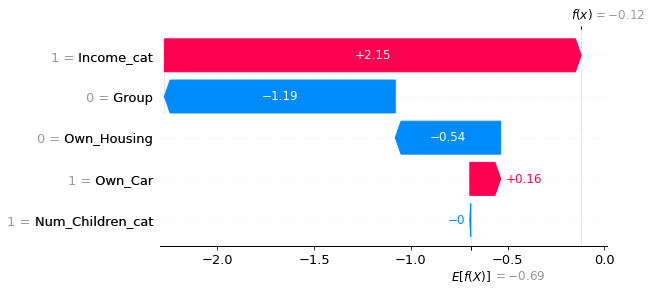

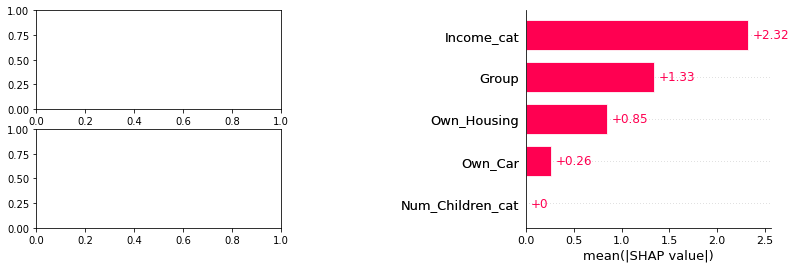

Affected Attribute Comparison
Average Comparison to True Class Members


Average Comparison to All Members


Random Affected Decision Process


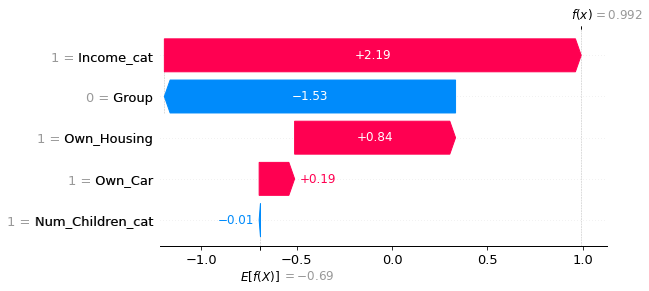

In [67]:

#change 6 
from itertools import product

for i,j in product([0,1],repeat=2):
  print("Visualization for affected_group = {0} and affected_target = {1}".format(i,j))
  fd.understand_shap(sensitive,labels,i,j)





In [68]:
#fd.understand_shap(labels,sensitive,1,0)

In [ ]:
fd.model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Using actual disparate 

Disparate Impact is defined as the ratio of favorable outcomes for the unpriviliged group divided by the ratio of favorable outcomes for the priviliged group. The acceptable threshold is between .8 and 1.25, with .8 favoring the priviliged group, and 1.25 favoring the unpriviliged group.

In [ ]:
fd.disparate_impact(sensitive,labels)

NameError: name 'xAxis' is not defined

In [ ]:


actual_test = X_test.copy()
actual_test['Target'] = y_test
actual_test.shape

In [ ]:
# Priviliged group: Males (1)
# Unpriviliged group: Females (0)
                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
two_or_more_df.describe()

In [ ]:
below_two_df.describe()

In [ ]:
unpriviliged_outcomes = two_or_more_df[two_or_more_df['Target'] == 1].shape[0]
unpriviliged_ratio = unpriviliged_outcomes/num_of_unpriviliged
unpriviliged_ratio

In [ ]:
priviliged_outcomes = below_two_df[below_two_df['Target'] == 1].shape[0]
priviliged_ratio = priviliged_outcomes/num_of_priviliged
priviliged_ratio

In [ ]:
# Calculating disparate impact
disparate_impact = unpriviliged_ratio / priviliged_ratio
print("Disparate Impact, Numb_of_children vs. Credit_card_approval: " + str(disparate_impact))

In [ ]:
!pip install aif360

In [ ]:
pip install --upgrade tensorflow

In [ ]:
pip install fairlearn==0.4.2

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover

In [ ]:
!pip3 install BlackBoxAuditing

In [ ]:
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover
# binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
#     df=yourDataFrameHere,
#     label_names=['yourOutcomeLabelHere'],
#     protected_attribute_names=['yourProtectedClassHere'])
# Must be a binaryLabelDataset
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=0,
    unfavorable_label=1,
    df=data,
    label_names=['Target'],
    protected_attribute_names=[sensitive])
di = DisparateImpactRemover(repair_level = 1.0)
dataset_transf_train = di.fit_transform(binaryLabelDataset)
transformed = dataset_transf_train.convert_to_dataframe()[0]
transformed